In [1]:
import torch
import numpy as np


In [31]:
a = torch.zeros(3,4)

print(a)



tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [68]:
class SimpleNN:
    def __init__(self,input_dim,num_neurons):
    
        self.w1 = torch.rand(input_dim,num_neurons,requires_grad=True)
        self.w2 = torch.rand(num_neurons,1,requires_grad=True)
        self.Loss = []
        self.b1 = torch.zeros(1,num_neurons,requires_grad=True)
        self.b2 = torch.zeros(1,1,requires_grad=True)

    
    def Tanh(self,x):
        return torch.tanh(x)
    
    
    
    
    def ReLU(self,x):
        return torch.relu(x)
    

    def softmax(self,x):
        ex = torch.exp(x - x.max(dim=1,keepdim=True).values)
        return ex / ex.sum(dim=1,keepdim=True)

    def cross_entropy(self,perdicted,target): 
        per_sample = - torch.sum(target * torch.log(perdicted + 1e-12),dim=1) 
        return per_sample.mean()
        
    



    def forward(self,X):

        self.z1 = X @ self.w1 + self.b1

        self.h1 = self.ReLU(self.z1)

        self.z2 = self.h1 @ self.w2 + self.b2

        self.y_hat = self.softmax(self.z2)

        return self.y_hat
    


    def back_prop(self,target,lr=1e-3):
        loss_value =  self.cross_entropy(self.y_hat,target=target)
        self.Loss.append(loss_value.item())

        #clearing old gradient good practice
        if self.w1.grad is not None:
            self.w1.grad.zero_()
            self.b1.grad.zero_()
            self.w2.grad.zero_()
            self.b2.grad.zero_()

        #clac the gradient

        loss_value.backward()


        with torch.no_grad():
            self.w1 -= lr * self.w1.grad
            self.b1 -= lr * self.b1.grad

            self.w2 -= lr * self.w2.grad
            self.b2 -= lr * self.b2.grad

        #after calling torch.no_grad the gradient should be re-enabled
        self.w1.requires_grad_(True)
        self.b1.requires_grad_(True)
        self.w2.requires_grad_(True)
        self.b2.requires_grad_(True)


        


      



In [ ]:
import torch

class SimpleNN:
    def __init__(self, input_dim, num_neurons):

        # MAKE WEIGHTS LEAF TENSORS 
        self.w1 = torch.randn(input_dim, num_neurons, requires_grad=True)
        self.w1.data *= 0.01

        self.b1 = torch.zeros(1, num_neurons, requires_grad=True)

        self.w2 = torch.randn(num_neurons, 10, requires_grad=True)
        self.w2.data *= 0.01

        self.b2 = torch.zeros(1, 10, requires_grad=True)

        self.Loss = []

    def ReLU(self, x):
        return torch.relu(x)

    def softmax(self, x):
        ex = torch.exp(x - x.max(dim=1, keepdim=True).values)
        return ex / ex.sum(dim=1, keepdim=True)

    def cross_entropy(self, predicted, target):
        per_sample = -torch.sum(target * torch.log(predicted + 1e-12), dim=1)
        return per_sample.mean()

    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.h1 = self.ReLU(self.z1)
        self.z2 = self.h1 @ self.w2 + self.b2
        self.y_hat = self.softmax(self.z2)
        return self.y_hat

    def back_prop(self, target, lr=1e-3):

        loss = self.cross_entropy(self.y_hat, target)
        self.Loss.append(float(loss.detach()))

        loss.backward()

        with torch.no_grad():
            self.w1 -= lr * self.w1.grad
            self.b1 -= lr * self.b1.grad
            self.w2 -= lr * self.w2.grad
            self.b2 -= lr * self.b2.grad

        self.w1.grad.zero_()
        self.b1.grad.zero_()
        self.w2.grad.zero_()
        self.b2.grad.zero_()

        return loss


In [83]:
model = SimpleNN(input_dim=64, num_neurons=100)

print(model.w1.grad, model.w2.grad)


None None


In [84]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)  # FIXED

# Tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# One-hot
y_train_oh = torch.eye(10)[y_train_t]
y_test_oh  = torch.eye(10)[y_test_t]



batch_size = 32
lr = 1e-3
epochs = 50

num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

        model.forward(X_batch)
        loss = model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")


Epoch 0, Loss = 2.3040
Epoch 5, Loss = 2.3028
Epoch 10, Loss = 2.2999
Epoch 15, Loss = 2.3015
Epoch 20, Loss = 2.3036
Epoch 25, Loss = 2.2999
Epoch 30, Loss = 2.2991
Epoch 35, Loss = 2.2990
Epoch 40, Loss = 2.3016
Epoch 45, Loss = 2.3010


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


digits = load_digits()
X = digits.data        # shape (1797, 64)
y = digits.target      # labels 0–9

print("X shape:", X.shape)
print("y shape:", y.shape)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train:", X_train.shape, "| Test:", X_test.shape)


X shape: (1797, 64)
y shape: (1797,)
Train: (1257, 64) | Test: (540, 64)


[ 262 1277 1133 1284 1557 1131 1281  626   49  449]


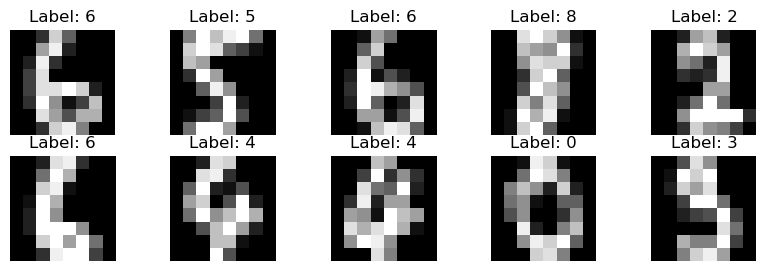

In [16]:
import matplotlib.pyplot as plt


idx = np.random.choice(len(X), 10, replace=False)
print(idx)
plt.figure(figsize=(10,3))

for i, img_idx in enumerate(idx):
    plt.subplot(2,5,i+1)
    plt.imshow(X[img_idx].reshape(-1,8), cmap="gray")
    plt.title(f"Label: {y[img_idx]}")
    plt.axis("off")

plt.show()

In [69]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(X_train)
x_test_norm = scaler.fit_transform(X_test)

#converting them to tensor

X_train_t = torch.tensor(x_train_norm,dtype=torch.float32)
X_test_t = torch.tensor(x_test_norm,dtype=torch.float32)

y_train_t = torch.tensor(y_train,dtype=torch.long)
y_test_t = torch.tensor(y_test,dtype=torch.long)


print(y_test_t.dtype,x_test_t.dtype)

torch.int64 torch.float32


In [70]:
def onehot(label):
    return torch.eye(10)[label]

y_train_oh = onehot(y_train_t)
y_test_oh  = onehot(y_test_t)
print(y_test_oh[:3])




tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])


In [71]:
model = SimpleNN(input_dim=64, num_neurons=100)


In [ ]:
batch_size = 32
lr = 1e-3
epochs = 50
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
 
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i : i + batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

       
        y_pred = model.forward(X_batch)

 
        model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {model.Loss[-1]:.4f}")

Epoch 0, Loss = 0.0000
Epoch 5, Loss = 0.0000
Epoch 10, Loss = 0.0000
Epoch 15, Loss = 0.0000
Epoch 20, Loss = 0.0000
Epoch 25, Loss = 0.0000
Epoch 30, Loss = 0.0000
Epoch 35, Loss = 0.0000
Epoch 40, Loss = 0.0000
Epoch 45, Loss = 0.0000


In [3]:
import torch
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [1]:
class SimpleNN:
    def __init__(self, input_dim, num_neurons, num_classes=10):
        #nn.Parameter when initializing
        self.w1 = torch.randn(input_dim, num_neurons) * 0.01
        self.w1 = torch.nn.Parameter(self.w1)

        self.b1 = torch.zeros(1, num_neurons)
        self.b1 = torch.nn.Parameter(self.b1)

        self.w2 = torch.randn(num_neurons, num_classes) * 0.01
        self.w2 = torch.nn.Parameter(self.w2)

        self.b2 = torch.zeros(1, num_classes)
        self.b2 = torch.nn.Parameter(self.b2)

        self.Loss = []



    
    def ReLU(self, x):
        return torch.relu(x)

    def softmax(self, x):
        ex = torch.exp(x - x.max(dim=1, keepdim=True).values)
        return ex / ex.sum(dim=1, keepdim=True)

    #loss cross-entropy 
    def cross_entropy(self, predicted, target):
        per_sample = -torch.sum(target * torch.log(predicted + 1e-12), dim=1)
        return per_sample.mean()

    # ---- Forward ----
    def forward(self, X):
        self.z1 = X @ self.w1 + self.b1
        self.h1 = self.ReLU(self.z1)
        self.z2 = self.h1 @ self.w2 + self.b2
        self.y_hat = self.softmax(self.z2)
        return self.y_hat

    # ---- Backward ----
    def back_prop(self, target, lr=1e-3):

        # compute loss
        loss = self.cross_entropy(self.y_hat, target)
        self.Loss.append(loss.item())

        # clear old gradients
        for p in [self.w1, self.b1, self.w2, self.b2]:
            if p.grad is not None:
                p.grad.zero_()

     
        loss.backward()

        
        with torch.no_grad():
            self.w1 -= lr * self.w1.grad
            self.b1 -= lr * self.b1.grad
            self.w2 -= lr * self.w2.grad
            self.b2 -= lr * self.b2.grad

        # re-enable grad
        self.w1.requires_grad_(True)
        self.b1.requires_grad_(True)
        self.w2.requires_grad_(True)
        self.b2.requires_grad_(True)

        return loss.item()


In [4]:
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=23
)

# scale
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# convert to tensors
X_train_t = torch.tensor(X_train_norm, dtype=torch.float32)
X_test_t  = torch.tensor(X_test_norm, dtype=torch.float32)

y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# one-hot
y_train_oh = torch.eye(10)[y_train_t]
y_test_oh  = torch.eye(10)[y_test_t]


In [10]:
model = SimpleNN(input_dim=64, num_neurons=100, num_classes=10)
print(model.w1.shape,'\n')
print(model.w2.shape)


torch.Size([64, 100]) 

torch.Size([100, 10])


In [ ]:
batch_size = 32
lr = 0.01          
epochs = 100
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    perm = torch.randperm(num_samples)

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_oh[idx]

        model.forward(X_batch)
        loss = model.back_prop(y_batch, lr=lr)

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")


Epoch 0, Loss = 1.0875
Epoch 5, Loss = 1.0860
Epoch 10, Loss = 0.5233
Epoch 15, Loss = 0.5310
Epoch 20, Loss = 0.7772
Epoch 25, Loss = 0.3361
Epoch 30, Loss = 0.6081
Epoch 35, Loss = 0.3299
Epoch 40, Loss = 0.3692
Epoch 45, Loss = 0.3623
Epoch 50, Loss = 0.2321
Epoch 55, Loss = 0.4991
Epoch 60, Loss = 0.3650
Epoch 65, Loss = 0.1187
Epoch 70, Loss = 0.2927
Epoch 75, Loss = 0.3862
Epoch 80, Loss = 0.1684
Epoch 85, Loss = 0.1233
Epoch 90, Loss = 0.0827
Epoch 95, Loss = 0.1249


In [97]:
y_pred = model.forward(X_test_t)
pred_labels = torch.argmax(y_pred, dim=1)

acc = (pred_labels == y_test_t).float().mean().item()
print("Test Accuracy:", acc)


Test Accuracy: 0.9259259104728699


Now classification with nn module

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



seq = nn.Sequential(
    nn.Linear(64,100),
    nn.ReLU(),
    nn.Linear(100,10)
    
)


criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(seq.parameters(),lr=0.01)

In [ ]:
seq = nn.Sequential(
    nn.Linear(64,100),
    nn.ReLU(),
    nn.Linear(100,10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(seq.parameters(),lr=1e-3)





In [ ]:
def test_step():
    seq.eval()
    with torch.no_grad():
        logits = seq(X_test_t)
        predictions = logits.argmax(dim=1)
        accuracy = (predictions == y_test_t).float().mean().item()
    return accuracy

# ---------------------------------------------------
# 6. Training loop (functional)
# ---------------------------------------------------
epochs = 500
batch_size = 5
num_samples = X_train_t.shape[0]

for epoch in range(epochs):
    perm = torch.randperm(num_samples)
    print(f' shape of perm {perm.shape} now permd \n{perm}\n{num_samples}')
    

    for i in range(0, num_samples, batch_size):
        idx = perm[i:i+batch_size]
        X_batch = X_train_t[idx]
        y_batch = y_train_t[idx]
        seq.train()
        optimizer.zero_grad()

        logits = seq(X_batch)
        loss = criterion(logits,y_batch) #ce losss
    
        loss.backward()
        optimizer.step()

        lo = loss.item()

    if epoch % 5 == 0:
        acc = test_step()
        print(f"Epoch {epoch:02d} | Loss: {lo:.4f} | Test Acc: {acc:.4f}")

# ---------------------------------------------------
# 7. Final accuracy
# ---------------------------------------------------
final_acc = test_step()
print("\nFinal Test Accuracy:", final_acc)

 shape of perm torch.Size([1257]) now permd 
tensor([782, 911, 674,  ..., 358,   9, 812])
1257

Final Test Accuracy: 0.9722222089767456


In [38]:
# seq.eval()

with torch.no_grad():
    logtis = seq(X_test_t)
    perdiction = logtis.argmax(dim=1)
    print(perdiction)
    acc = (perdiction == y_test_t).float().mean().item()
    print(acc)

tensor([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3, 9, 7,
        5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3, 6, 1, 3, 0,
        6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5, 7, 0, 7, 5, 9, 5,
        5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4, 4, 9, 1, 2, 8, 3, 5, 2,
        9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2, 7, 7, 4, 4, 1, 9, 2, 7, 8, 7,
        2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5, 7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6,
        9, 9, 6, 9, 0, 5, 5, 6, 6, 0, 6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6,
        5, 9, 9, 8, 4, 2, 1, 3, 7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4,
        1, 2, 4, 2, 3, 6, 4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8,
        6, 0, 4, 5, 2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5,
        8, 5, 5, 1, 0, 1, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
        7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5, 5, 9,
        9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4,

working with nn module as child-parent where mlp is chile of nn.Module

In [ ]:
class MLP(nn.Module):
    def __init__(self, input=64,hid=100,num_class = 10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input,hid),
            nn.ReLU(),
            nn.Linear(hid,num_class)
        )

    

    def forward(self,X):
        return self.model(X)


mlp_model = MLP()



print(mlp_model)


MLP(
  (model): Sequential(
    (0): Linear(in_features=64, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp_model.parameters(),lr=1e-3)


batch_size = 20
epochs = 400
nusamples = X_train_t.shape[0]
print(nusamples)


for epoch in range(epochs):
    perm = torch.randperm(nusamples)

    for i in range(0,nusamples,batch_size):
        idx = perm[i:i+batch_size]

        X_batch = X_train_t[idx]
        y_batch = y_train_t[idx]

        logits = mlp_model(X_batch)
        loss = criterion(logits,y_batch)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        print(f'epoch {epoch} | loss is {loss.item():.3f}')
    



1257
epoch 0 | loss is 0.057
epoch 5 | loss is 0.117
epoch 10 | loss is 0.398
epoch 15 | loss is 0.171
epoch 20 | loss is 0.153
epoch 25 | loss is 0.236
epoch 30 | loss is 0.114
epoch 35 | loss is 0.106
epoch 40 | loss is 0.100
epoch 45 | loss is 0.128
epoch 50 | loss is 0.097
epoch 55 | loss is 0.158
epoch 60 | loss is 0.146
epoch 65 | loss is 0.117
epoch 70 | loss is 0.080
epoch 75 | loss is 0.124
epoch 80 | loss is 0.065
epoch 85 | loss is 0.132
epoch 90 | loss is 0.159
epoch 95 | loss is 0.152
epoch 100 | loss is 0.152
epoch 105 | loss is 0.042
epoch 110 | loss is 0.171
epoch 115 | loss is 0.164
epoch 120 | loss is 0.060
epoch 125 | loss is 0.259
epoch 130 | loss is 0.135
epoch 135 | loss is 0.061
epoch 140 | loss is 0.029
epoch 145 | loss is 0.205
epoch 150 | loss is 0.073
epoch 155 | loss is 0.166
epoch 160 | loss is 0.175
epoch 165 | loss is 0.357
epoch 170 | loss is 0.081
epoch 175 | loss is 0.176
epoch 180 | loss is 0.091
epoch 185 | loss is 0.029
epoch 190 | loss is 0.088
epo

TypeError: 'SimpleNN' object is not callable

In [54]:
with torch.no_grad():
    logits = mlp_model(X_test_t)
    predictions = torch.argmax(logits, dim=1)
    accuracy = (predictions == y_test_t).float().mean()

print("\nTest accuracy:", accuracy.item())


Test accuracy: 0.9574074149131775
